<a href="https://colab.research.google.com/github/sanjoy-kumar/Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from numpy import argmax
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

**Data Initialization**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv',index_col=0)
data['famhist']= pd.get_dummies(data['famhist'])
data = data.values
X = data[:,0:9].astype(float)
Y = data[:,9]

**Part A**
----------


**Q1. The accuracy**

In [ ]:
xTrain, xTest,yTrain,yTest=train_test_split(X,Y,test_size=0.50, random_state=70)

kclusters = 2
k_means = KMeans(n_clusters=kclusters)
k_means.fit(xTrain)
yPredict= k_means.predict(xTest)
score = metrics.accuracy_score(yTest,yPredict)
print('Accuracy:{0:.2f}%'.format(score*100))


Accuracy:65.37%


**Q2. Plot 'sbp' vs 'tobacco' and represent the actual data points with different color to show the two classes.**

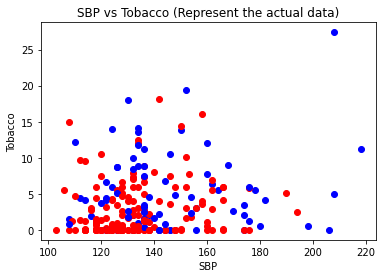

In [ ]:

#Visualise data points
xSBP = xTest[:,0]
yTobacco = xTest[:,1]

for i in range(len(yTest)):
    if yTest[i]==1:
        plt.scatter(xSBP[i],yTobacco[i],color='blue')
    else:
        plt.scatter(xSBP[i],yTobacco[i],color='red')

plt.title("SBP vs Tobacco (Represent the actual data)")
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.show()

**Q3. Plot 'sbp' vs 'tobacco' and represent the predicted data points with different color to show the two classes.**

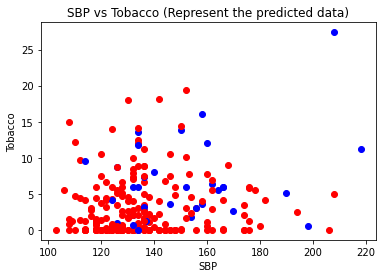

In [ ]:
#Visualise data points
xSBP = xTest[:,0]
yTobacco = xTest[:,1]

for i in range(len(yPredict)):
    if yPredict[i]==1:
        plt.scatter(xSBP[i],yTobacco[i],color='blue')
    else:
        plt.scatter(xSBP[i],yTobacco[i],color='red')

plt.title("SBP vs Tobacco (Represent the predicted data)")
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.show()


**Neural network:**
------------------



**Q4. Provide the accuracy.**

In [ ]:
#------------------------- Encoding ----------------------------------------------

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encodedY = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummyY = np_utils.to_categorical(encodedY)

# ---------------------- Normalization Data----------------------------------------
# define Standard Scaler
scaler = StandardScaler()
# transform data
scaledX = scaler.fit_transform(X)

# ---------------------- Spliting Data----------------------------------------------

xTrain2,xTest2,yTrain2,yTest2 = train_test_split(scaledX,dummyY,test_size=0.50,random_state=70)


# --------------- Structure: FCL (500,500,128 and 2 units) => three hidden layers and one output layer -----------

def build_and_compile_model():
	# create model
	model = Sequential()
	model.add(Dense(500,input_dim=9, activation='relu'))
	model.add(Dense(500,activation='relu'))
	model.add(Dense(128,activation='relu'))
	model.add(Dense(2, activation='softmax'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


estimator = KerasClassifier(build_fn=build_and_compile_model, epochs=35, batch_size=12, verbose=0)
results = cross_val_score(estimator, xTrain2, yTrain2)
print("Accuracy: %.2f%% " % (results.mean()*100))

Accuracy: 65.78% 


**Q5. Plot 'sbp' vs 'tobacco' and represent the actual data points with different color to show the two classes.**

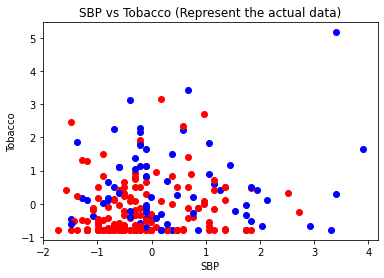

In [ ]:
#Visualise data points
xSBP = xTest2[:,0]
yTobacco = xTest2[:,1]

# invert encoding
inverted = np.argmax(yTest2, axis=1)


for i in range(len(inverted)):
    if inverted[i]==1:
        plt.scatter(xSBP[i],yTobacco[i],color='blue')
    else:
        plt.scatter(xSBP[i],yTobacco[i],color='red')

plt.title("SBP vs Tobacco (Represent the actual data)")
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.show()

**Q6. Plot 'sbp' vs 'tobacco' and represent the predicted data points with different color to show the two classes.**

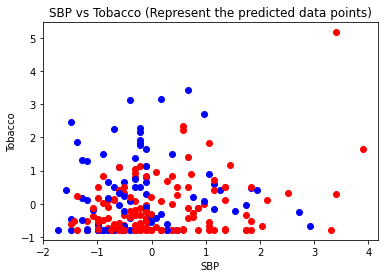

In [ ]:
#Visualise data points
estimator.fit(xTrain2, yTrain2)
yPredict2= estimator.predict(xTest2)

for i in range(len(yPredict2)):
    if yPredict2[i]==1:
        plt.scatter(xSBP[i],yTobacco[i],color='blue')
    else:
        plt.scatter(xSBP[i],yTobacco[i],color='red')

plt.title("SBP vs Tobacco (Represent the predicted data points)")
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.show()


**Part-B**
---------


**Q7: How many PCs explain more than 90% of variation?**

In [ ]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(scaledX)
principalDf = pd.DataFrame(data = principalComponents,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
Y = np.reshape(Y,(462,1))
finalDf = np.concatenate([principalDf, Y], axis = 1)
pcaVariance= pca.explained_variance_ratio_
pcaCumSum = pca.explained_variance_ratio_.cumsum()
count =0
for i in range(len(pcaCumSum)):
    if pcaCumSum[i] > 0.90:
        count = i + 1
        break

print("\nNumber of PCs more than 90% of variation is",count)


Number of PCs more than 90% of variation is 7


**Q8: How much variation is explained by first two PCs?**

In [ ]:
pc1 = pcaVariance[0]
pc2 = pcaVariance[1]
pc = (pc1 + pc2)*100
print("About %.2f%% " % (pc) + "of the variation is explained by the first two PCs.")

About 45.35% of the variation is explained by the first two PCs.


**Perform K-Means clustering using PCs that explain 90% variation.**
-------------------------------------------------------------------
**Q9:Provide the accuracy**

In [ ]:
principalDf90 = principalDf.iloc[:,0:count]
xTrain3,xTest3,yTrain3,yTest3=train_test_split(principalDf90,Y,test_size=0.50,random_state=70)
kclusters = 2
k_means = KMeans(n_clusters=kclusters)
k_means.fit(xTrain3)
yPredict3= k_means.predict(xTest3)
score = metrics.accuracy_score(yTest3,yPredict3)
print('Accuracy:{0:.2f}%'.format(score*100))


Accuracy:67.10%


**Q10. Plot 'PC1' vs 'PC2' and represent the actual data points with different color to show the two classes.**

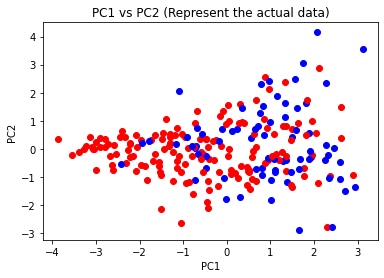

In [ ]:
#Visualise data points
xPC1 = xTest3.iloc[:,0]
yPC2 = xTest3.iloc[:,1]
xPC1 = np.array(xPC1)
yPC2 = np.array(yPC2)


for i in range(len(yTest3)):
    if yTest3[i]==1:
        plt.scatter(xPC1[i],yPC2[i],color='blue')
    else:
        plt.scatter(xPC1[i],yPC2[i],color='red')

plt.title("PC1 vs PC2 (Represent the actual data)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Q11. Plot 'PC1' vs 'PC2' and represent the predicted data points with different color to show the two classes.**

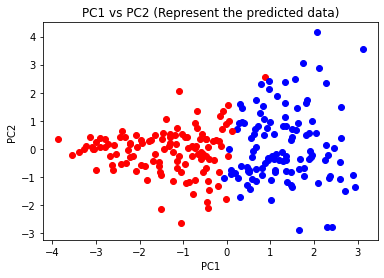

In [ ]:
for i in range(len(yPredict3)):
    if yPredict3[i]==1:
        plt.scatter(xPC1[i],yPC2[i],color='blue')
    else:
        plt.scatter(xPC1[i],yPC2[i],color='red')

plt.title("PC1 vs PC2 (Represent the predicted data)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Perform classifcation using NN from above using PCs that explain 90% variation.**
--------------------------------------------------------------------------------
**Q12. Provide the accuracy**



In [ ]:
X = principalDf90.values.astype(float)
Y = data[:,9]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encodedY = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummyY = np_utils.to_categorical(encodedY)

# ---------------------- Normalization Data----------------------------------------
# define Standard Scaler
scaler = StandardScaler()
# transform data
scaledX = scaler.fit_transform(X)

# ---------------------- Spliting Data----------------------------------------------

xTrain4,xTest4,yTrain4,yTest4 = train_test_split(scaledX,dummyY,test_size=0.50,random_state=70)

# --------------- Structure: FCL (500,500,128 and 2 units) => three hidden layers and one output layer -----------

def build_and_compile_model_2():
	# create model
	model = Sequential()
	model.add(Dense(500,input_dim=7, activation='relu'))
	model.add(Dense(500,activation='relu'))
	model.add(Dense(128,activation='relu'))
	model.add(Dense(2, activation='softmax'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator2 = KerasClassifier(build_fn=build_and_compile_model_2,epochs=35,batch_size=12,verbose=0)
results2 = cross_val_score(estimator2,xTrain4,yTrain4)
print("Accuracy: %.2f%% " % (results2.mean()*100))



Accuracy: 66.65% 


**Q13. Plot 'PC1' vs 'PC2' and represent the actual data points with different color to show the two classes.**


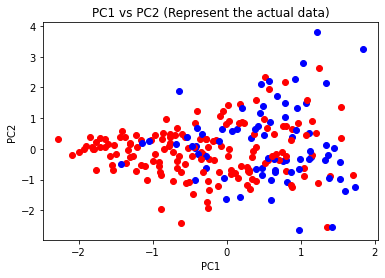

In [ ]:
#Visualise data points
xPC1 = xTest4[:,0]
yPC2 = xTest4[:,1]

# invert encoding
inverted = np.argmax(yTest4, axis=1)


for i in range(len(inverted)):
    if inverted[i]==1:
        plt.scatter(xPC1[i],yPC2[i],color='blue')
    else:
        plt.scatter(xPC1[i],yPC2[i],color='red')

plt.title("PC1 vs PC2 (Represent the actual data)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Q14. Plot 'PC1' vs 'PC2' and represent the predicted data points with different color to show the two classes.**

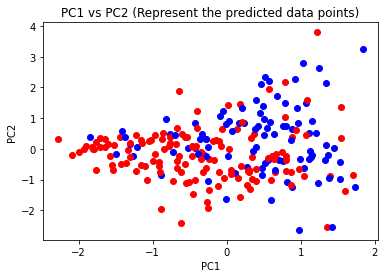

In [ ]:
#Visualise data points

estimator2.fit(xTrain4,yTrain4)
yPredict4= estimator2.predict(xTest4)

#yPredict4=(estimator.predict(xTest2) > 0.5).astype("int32")

for i in range(len(yPredict4)):
    if yPredict4[i]==1:
        plt.scatter(xPC1[i],yPC2[i],color='blue')
    else:
        plt.scatter(xPC1[i],yPC2[i],color='red')

plt.title("PC1 vs PC2 (Represent the predicted data points)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


**For Bonus**
-------------


**Part-A**
----------
**Perform logistic regression for raw data and provide accuracy.**

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(xTrain, yTrain)
score = logisticRegr.score(xTest, yTest)
print("Accuracy: %.2f%% " % (score*100))

Accuracy: 71.86% 



**Part- B**
----------
**Perform logistic regression for PCs that explain 90% variation and provide accuracy.**


In [ ]:
logisticRegr2 = LogisticRegression()
logisticRegr2.fit(xTrain3, yTrain3)
score2 = logisticRegr2.score(xTest3, yTest3)
print("Accuracy: %.2f%% " % (score2*100))

Accuracy: 73.59% 


**Out of three classifications, Which classifier would you propose to classify "chd"?**

Logistic regression for PCs.